### Linear fit example as a stub

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pprint import pprint as pp

# Choose dataframe
df_name = 'df_cases'

pickle_file = open(f'pickles/{df_name}''.p', 'rb')
df = pickle.load(pickle_file)
pickle_file.close()

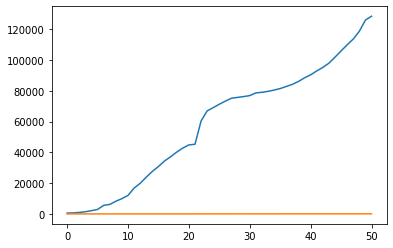

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from lmfit import Model
from lmfit.models import LinearModel

# Nonlinear least squares starting point, using LinearModel
df = df.groupby('day').sum().reset_index()
df = df[['day', 'cases']]
model = LinearModel()
params = model.make_params()
result = model.fit(df.day, params, x=df.day.to_list())
plt.plot(df.day, df.cases)
plt.plot(df.day, result.best_fit)
plt.show()
